# Step-by-Step Guide
## Import necessary libraries

1. Load the Data
First, you will load the dataset from the UC Irvine repository and define column names. The dataset is in the auto-mpg.data file, and you can load it into a pandas DataFrame using Python’s pandas library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the URL
print("Step 1: Loading data...")
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
           'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, delim_whitespace=True, names=columns)

# Review the data (e.g., first five rows)
print(df.head())


Step 1: Loading data...


C:\Users\MLuca\AppData\Local\Temp\ipykernel_27192\2337276949.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)


    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


2. Review the Dataset
Next, review the dataset description from the UCI link you were given, which includes details about the attributes. The dataset includes various columns, but they are not labeled yet. So we will need to assign proper names to the DataFrame columns.

In [2]:
print("\nStep 2: Initial data review")
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())
# Check if the columns are correctly named
print(df.head())



Step 2: Initial data review

First few rows of the dataset:
    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg     

3. Handle Missing Data in Horsepower Column
The horsepower column contains missing values represented as '?'. We need to replace these values with NaN (Not a Number), which pandas can recognize, and then convert the entire column to numeric.

In [3]:
print("\nStep 3: Handling missing horsepower values")
print("Number of '?' in horsepower before cleaning:", (df['horsepower'] == '?').sum())
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))
print("Number of missing values (NA) in horsepower after cleaning:", df['horsepower'].isna().sum())


Step 3: Handling missing horsepower values
Number of '?' in horsepower before cleaning: 6
Number of missing values (NA) in horsepower after cleaning: 6


You can decide to drop or fill these missing values using methods like dropna() or fillna() depending on your data cleaning strategy. For simplicity, we’ll drop the rows with missing horsepower values.

In [4]:
# Drop rows with missing horsepower
df.dropna(subset=['horsepower'], inplace=True)

4. Convert Origin Column
The origin column contains values 1, 2, and 3, which represent the geographical origin of the cars. Convert these numeric values into corresponding labels (USA, Asia, and Europe).

In [5]:
print("\nStep 4: Converting origin values")
origin_map = {1: 'USA', 2: 'Asia', 3: 'Europe'}
df['origin'] = df['origin'].map(origin_map)
print("\nUnique values in 'origin' after conversion:", df['origin'].unique())


Step 4: Converting origin values

Unique values in 'origin' after conversion: ['USA' 'Europe' 'Asia']


5. Bar Chart for Cylinder Distribution
Now, create a bar chart that shows the distribution of the number of cylinders in the cars.


Step 5: Creating cylinder distribution bar chart


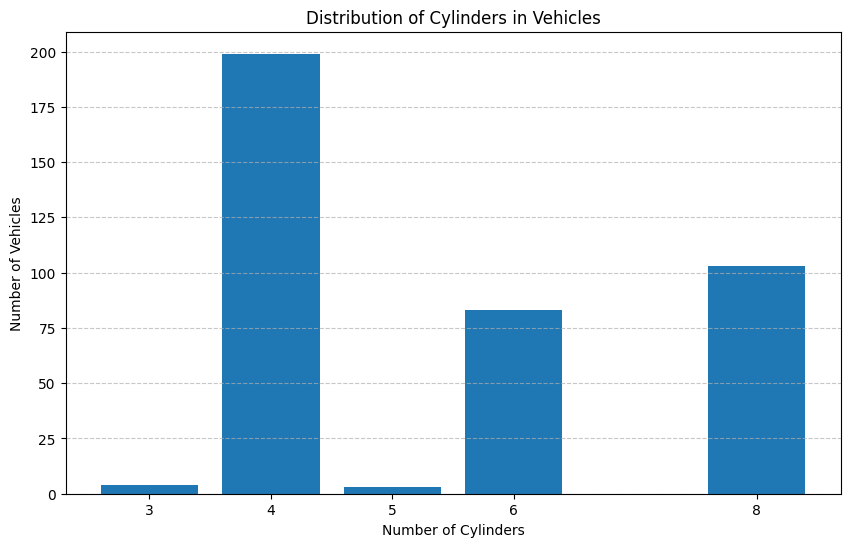

In [6]:
print("\nStep 5: Creating cylinder distribution bar chart")
plt.figure(figsize=(10, 6))
cylinder_counts = df['cylinders'].value_counts().sort_index()
plt.bar(cylinder_counts.index, cylinder_counts.values)
plt.title('Distribution of Cylinders in Vehicles')
plt.xlabel('Number of Cylinders')
plt.ylabel('Number of Vehicles')
plt.xticks(cylinder_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Step 5: Creating cylinder distribution per country bar chart


<Figure size 1200x600 with 0 Axes>

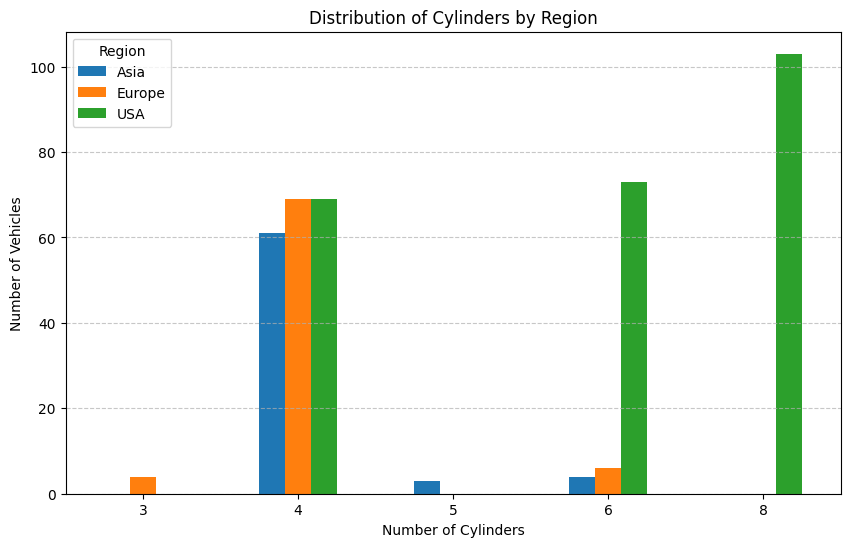

In [7]:
print("\nStep 5: Creating cylinder distribution per country bar chart")
plt.figure(figsize=(12, 6))

# Count the number of cars by 'cylinders' and 'origin'
cylinder_country_counts = df.groupby(['cylinders', 'origin']).size().unstack()

# Plot a grouped bar chart for cylinders per country
cylinder_country_counts.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Distribution of Cylinders by Region')
plt.xlabel('Number of Cylinders')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Region')
plt.show()

6. Scatterplot: Horsepower vs. Weight
Next, create a scatter plot to examine the relationship between horsepower and weight.


Step 6: Creating horsepower vs weight scatter plot


Text(0, 0.5, 'Weight')

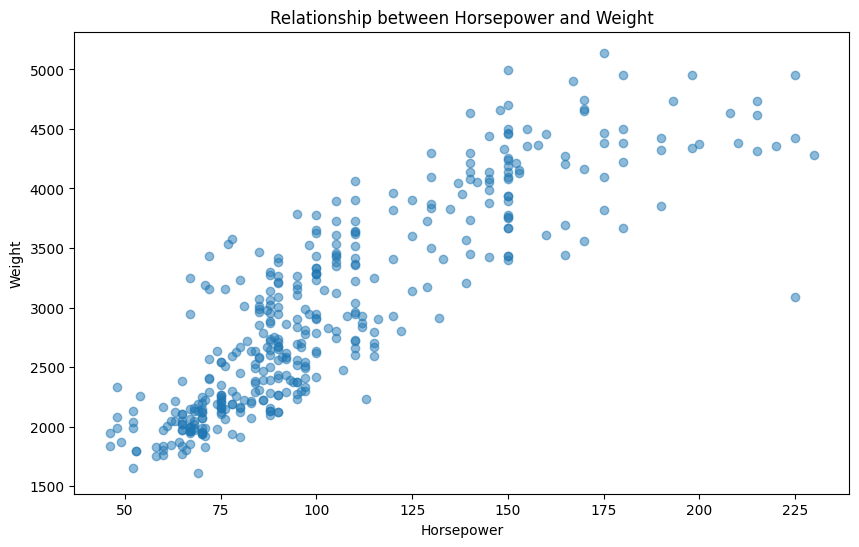

In [10]:
print("\nStep 6: Creating horsepower vs weight scatter plot")
plt.figure(figsize=(10, 6))
clean_data = df[['horsepower', 'weight']].dropna()
plt.scatter(clean_data['horsepower'], clean_data['weight'], alpha=0.5)
plt.title('Relationship between Horsepower and Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
# Add a trend line to the scatter plot
z = np.polyfit(clean_data['horsepower'], clean_data['weight'], 1)
p = np.poly1d(z)
plt.plot(clean_data['horsepower'], p(clean_data['horsepower']), "r--", 
         alpha=0.8, label=f'Trend line (y = {z[0]:.1f}x + {z[1]:.1f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

7. Ask and Answer an Interesting Question
An interesting question might be: How does MPG vary across different origins? You can answer this by creating a boxplot that shows the distribution of MPG for cars from different origins.

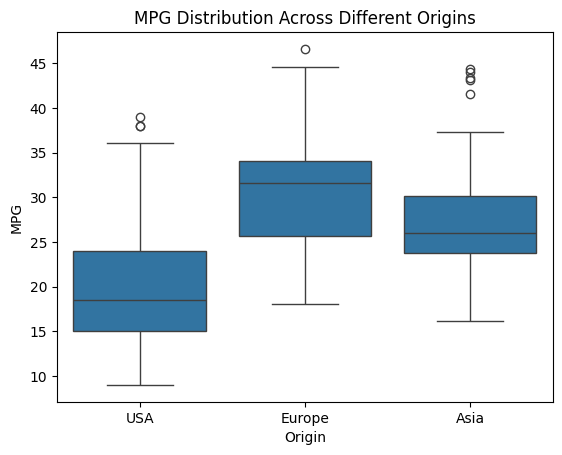

In [18]:
# Boxplot showing MPG across different origins
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('MPG Distribution Across Different Origins')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()

C:\Users\MLuca\AppData\Local\Temp\ipykernel_22760\3086818227.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)



First few rows of the dataset:
    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64

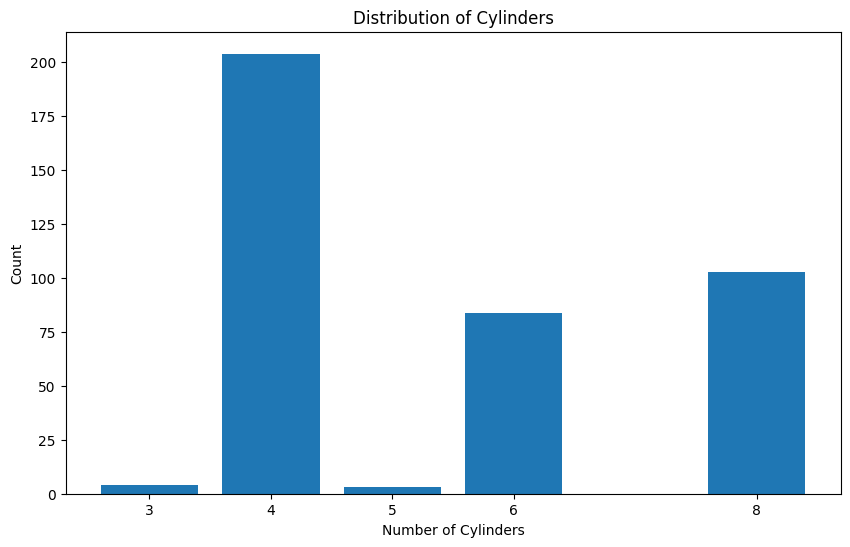

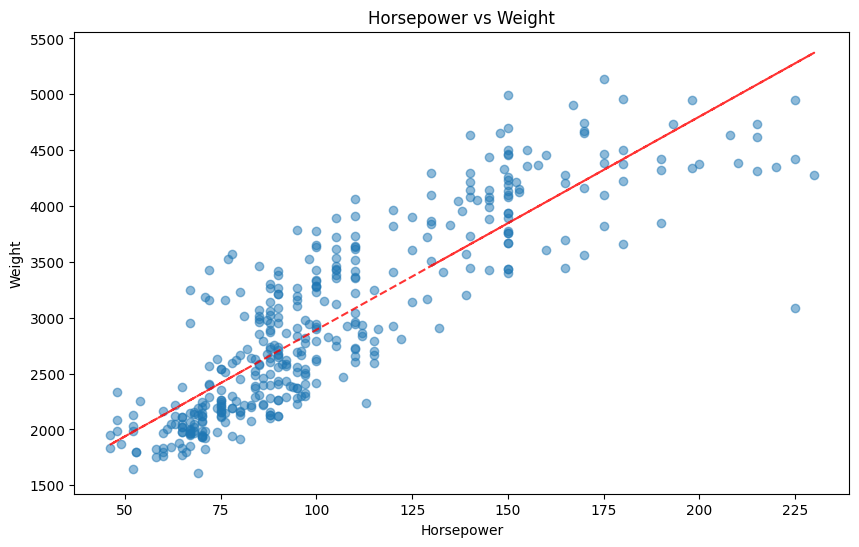

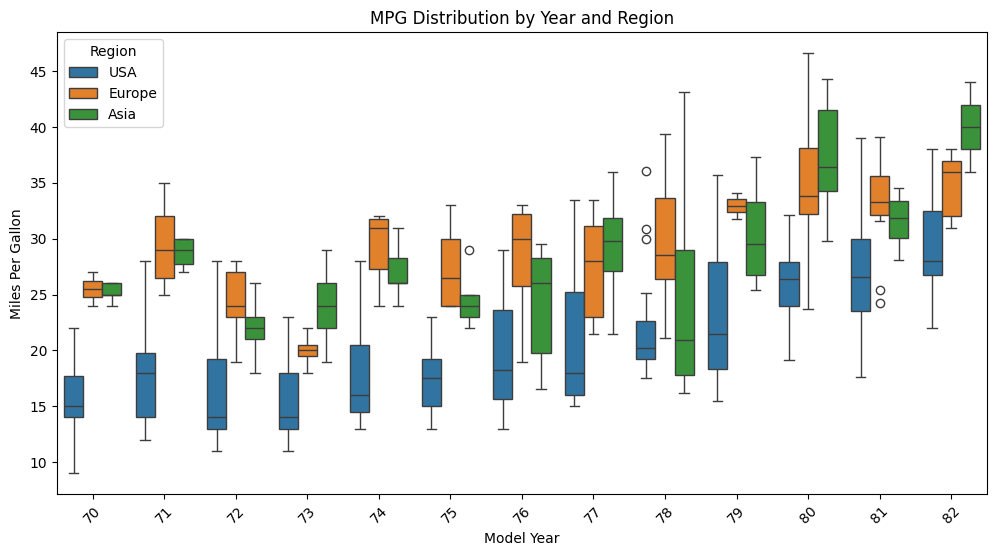

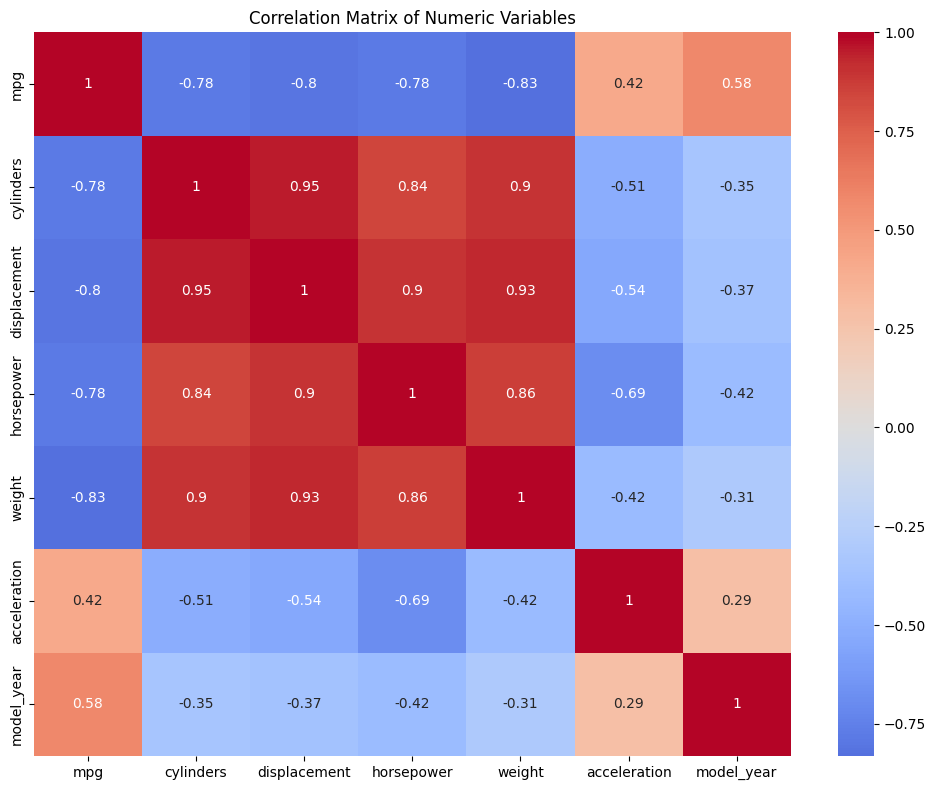


Missing Values Count:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data directly from URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
           'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, delim_whitespace=True, names=columns)

# 2. Review the data
print("\nFirst few rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# 4. Replace '?' with NaN in horsepower and convert to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', pd.NA))

# 5. Convert origin values to region names
origin_map = {1: 'USA', 2: 'Asia', 3: 'Europe'}
df['origin'] = df['origin'].map(origin_map)

# Print data overview after cleaning
print("\nData Overview After Cleaning:")
print(df.describe())

# 6. Create bar chart for cylinders distribution
plt.figure(figsize=(10, 6))
cylinder_counts = df['cylinders'].value_counts().sort_index()
plt.bar(cylinder_counts.index, cylinder_counts.values)
plt.title('Distribution of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.xticks(cylinder_counts.index)
plt.show()

# 7. Create scatterplot for horsepower vs weight
plt.figure(figsize=(10, 6))

# Drop NA values from both columns simultaneously
clean_data = df[['horsepower', 'weight']].dropna()

plt.scatter(clean_data['horsepower'], clean_data['weight'], alpha=0.5)
plt.title('Horsepower vs Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')

# Add trend line using cleaned data
z = np.polyfit(clean_data['horsepower'], clean_data['weight'], 1)
p = np.poly1d(z)
plt.plot(clean_data['horsepower'], p(clean_data['horsepower']), "r--", alpha=0.8)
plt.show()

# 8. Additional interesting analysis: MPG trends over time by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='model_year', y='mpg', hue='origin')
plt.title('MPG Distribution by Year and Region')
plt.xlabel('Model Year')
plt.ylabel('Miles Per Gallon')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

# Additional analysis: Correlation matrix heatmap
plt.figure(figsize=(10, 8))
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Print missing value count
print("\nMissing Values Count:")
print(df.isnull().sum())

Step 1: Loading data...


C:\Users\MLuca\AppData\Local\Temp\ipykernel_22760\1017826967.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)



Step 2: Initial data review

First few rows:
    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-n

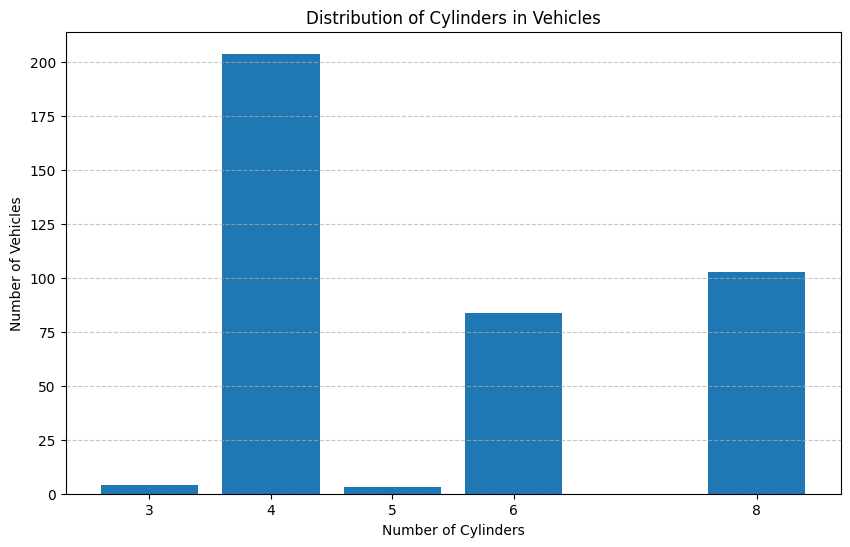


Step 7: Creating horsepower vs weight scatter plot


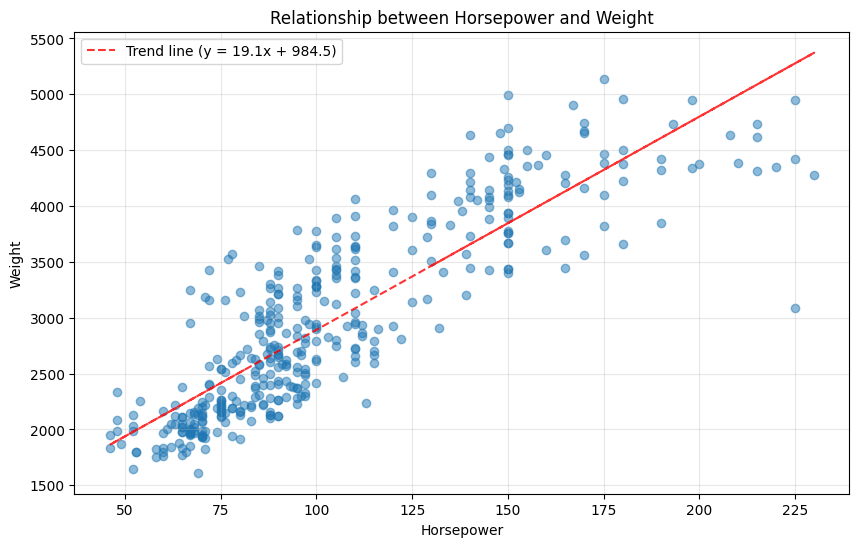


Step 8: Analyzing MPG trends over time by region


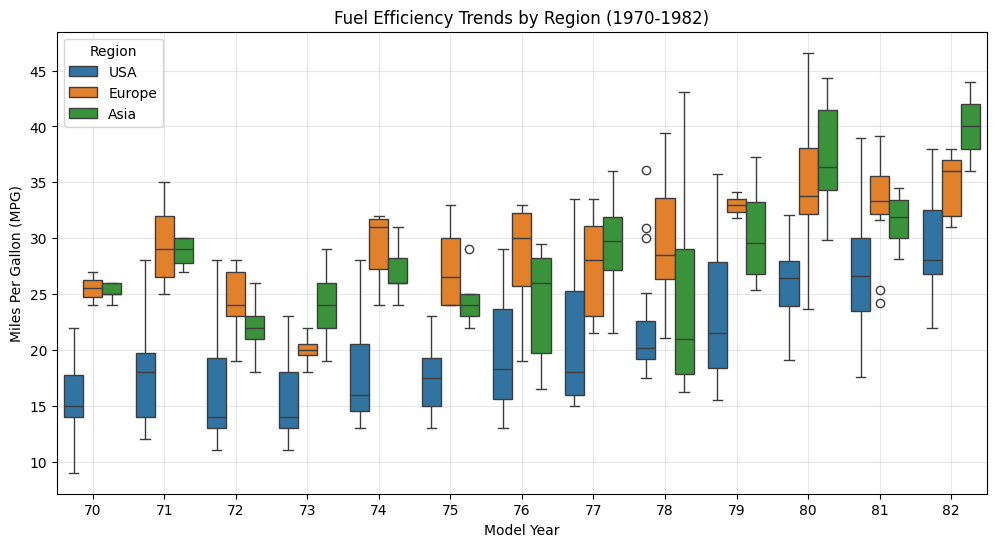


Analysis of MPG trends:

Average MPG by region:
origin
Asia      27.89
Europe    30.45
USA       20.08
Name: mpg, dtype: float64

MPG improvement from 1970 to 1982 by region:
USA: 92.83% improvement
Europe: 36.82% improvement
Asia: 58.73% improvement


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data from URL
print("Step 1: Loading data...")
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
# Using the column names from auto-mpg.names
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
           'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, delim_whitespace=True, names=columns)

# 2. Review the data
print("\nStep 2: Initial data review")
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())

# 4. Handle missing horsepower values
print("\nStep 4: Handling missing horsepower values")
print("Number of '?' in horsepower before cleaning:", (df['horsepower'] == '?').sum())
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', pd.NA))
print("Number of NA in horsepower after cleaning:", df['horsepower'].isna().sum())

# 5. Convert origin values
print("\nStep 5: Converting origin values")
origin_map = {1: 'USA', 2: 'Asia', 3: 'Europe'}
df['origin'] = df['origin'].map(origin_map)
print("\nUnique values in origin after conversion:", df['origin'].unique())

# 6. Cylinder distribution bar chart
print("\nStep 6: Creating cylinder distribution bar chart")
plt.figure(figsize=(10, 6))
cylinder_counts = df['cylinders'].value_counts().sort_index()
plt.bar(cylinder_counts.index, cylinder_counts.values)
plt.title('Distribution of Cylinders in Vehicles')
plt.xlabel('Number of Cylinders')
plt.ylabel('Number of Vehicles')
plt.xticks(cylinder_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. Horsepower vs Weight scatter plot
print("\nStep 7: Creating horsepower vs weight scatter plot")
plt.figure(figsize=(10, 6))
clean_data = df[['horsepower', 'weight']].dropna()
plt.scatter(clean_data['horsepower'], clean_data['weight'], alpha=0.5)
plt.title('Relationship between Horsepower and Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')

# Add trend line
z = np.polyfit(clean_data['horsepower'], clean_data['weight'], 1)
p = np.poly1d(z)
plt.plot(clean_data['horsepower'], p(clean_data['horsepower']), "r--", 
         alpha=0.8, label=f'Trend line (y = {z[0]:.1f}x + {z[1]:.1f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 8. Interesting question: 
# "How has fuel efficiency (MPG) changed over time for different regions?"
print("\nStep 8: Analyzing MPG trends over time by region")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='model_year', y='mpg', hue='origin')
plt.title('Fuel Efficiency Trends by Region (1970-1982)')
plt.xlabel('Model Year')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend(title='Region')
plt.grid(True, alpha=0.3)
plt.show()

# Print analysis of the interesting question
print("\nAnalysis of MPG trends:")
print("\nAverage MPG by region:")
print(df.groupby('origin')['mpg'].mean().round(2))

print("\nMPG improvement from 1970 to 1982 by region:")
mpg_by_year_region = df.groupby(['origin', 'model_year'])['mpg'].mean()
for region in df['origin'].unique():
    early_mpg = mpg_by_year_region[region][70]
    late_mpg = mpg_by_year_region[region][82]
    improvement = ((late_mpg - early_mpg) / early_mpg * 100).round(2)
    print(f"{region}: {improvement}% improvement")